# Lending Club Data Exploratory Analysis

- This notebook is a exploratory analysis for lending club dataset.
- The dataset can be downloaded from https://www.kaggle.com/wendykan/lending-club-loan-data

## High level findings:
### Based on data visualization and statistics summary in this part, we have several key findings at a high level as follows.
 - Loans on lending club have highest loan amount of 35000 dollars. And loans with loan amount around 10000 dollars are most frequent on lending club platform.
 - Most frequent loan purpose of loans on lending club platform is to pay other debts. Around 59% of loans are taken for debt consolication, and around 23% of loans are taken for credit card, hence, about 82% loans are for taken to resolve other debts.
 - As grade of loan got worse from Grade A to G, likelihood that loan will charged off increses. This supports that loan grade provided by lending club as a whole is a good incidator of chargeoff likelihood.
 - Compared with 36 months term loans, 60 months loans have higher interest rates. And with the grade of loan get worse, interest rate goes higher. 
 - With borrowers' annual income increase, loans are less likely to charge off or go default. And when borrowers with more public derogatory records, loans are more likely to charge off or go default.

## Import Packages

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 8,6
pd.set_option('max_columns', 120)

## Load data and data dictionary

In [2]:
data_path = "/Users/xinyuxu/Documents/loan.csv"
dictionary_path = "/Users/xinyuxu/Documents/LCDataDictionary/LoanStats.csv"

In [3]:
df = pd.read_csv(data_path, low_memory=False)
data_dictionary = pd.read_csv(dictionary_path)
data_dictionary = data_dictionary.iloc[:77,:2]
data_dictionary['name'] = data_dictionary['LoanStatNew']
data_dictionary = data_dictionary.drop(columns=['LoanStatNew'])
df_dtypes = pd.DataFrame(df.dtypes,columns=['dtypes'])
df_dtypes = df_dtypes.reset_index()
df_dtypes['name'] = df_dtypes['index']
df_dtypes = df_dtypes[['name','dtypes']]
df_dtypes['first_row'] = df.loc[0].values

In [4]:
pd.set_option("display.max_rows", 100)
df_dic = df_dtypes.merge(data_dictionary, on='name',how='left')

In [5]:
df_dic

,name,dtypes,first_row,Description
0,id,int64,1077501,A unique LC assigned ID for the loan listing.
1,member_id,int64,1296599,A unique LC assigned Id for the borrower member.
2,loan_amnt,float64,5000,The listed amount of the loan applied for by t...
3,funded_amnt,float64,5000,The total amount committed to that loan at tha...
4,funded_amnt_inv,float64,4975,The total amount committed by investors for th...
5,term,object,36 months,The number of payments on the loan. Values are...
6,int_rate,float64,10.65,Interest Rate on the loan
7,installment,float64,162.87,The monthly payment owed by the borrower if th...
8,grade,object,B,LC assigned loan grade
9,sub_grade,object,B2,LC assigned loan subgrade


## Data Dimension

In [6]:
print("The dataset contains %d rows and %d columns"%(df.shape[0],df.shape[1]))

The dataset contains 887379 rows and 74 columns


In [7]:
df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Variable Type and Missing Pattern

In [8]:
print("The following %d columns are encoded as object type"% (len(df.select_dtypes(include=['O']).T)))
df.select_dtypes(include=['O']).describe().T \
    .assign(missing_rate=df.apply(lambda x : (len(x)-x.count())/len(x)))

The following 23 columns are encoded as object type


,count,unique,top,freq,missing_rate
term,887379,2,36 months,621125,0.000000
grade,887379,7,B,254535,0.000000
sub_grade,887379,35,B3,56323,0.000000
emp_title,835917,299271,Teacher,13469,0.057993
emp_length,842554,11,10+ years,291569,0.050514
home_ownership,887379,6,MORTGAGE,443557,0.000000
verification_status,887379,3,Source Verified,329558,0.000000
issue_d,887379,103,Oct-2015,48631,0.000000
loan_status,887379,10,Current,601779,0.000000
pymnt_plan,887379,2,n,887369,0.000000


In [9]:
print("The following %d columns are encoded as float type"% (len(df.select_dtypes(include=['float64']).T)))
df.select_dtypes(include=['float64']).describe().T \
    .assign(missing_rate=df.apply(lambda x : (len(x)-x.count())/len(x)))

The following 49 columns are encoded as float type


,count,mean,std,min,25%,50%,75%,max,missing_rate
loan_amnt,887379.0,14755.264605,8435.455601,500.00,8000.000,13000.000000,20000.000000,3.500000e+04,0.000000
funded_amnt,887379.0,14741.877625,8429.897657,500.00,8000.000,13000.000000,20000.000000,3.500000e+04,0.000000
funded_amnt_inv,887379.0,14702.464383,8442.106732,0.00,8000.000,13000.000000,20000.000000,3.500000e+04,0.000000
int_rate,887379.0,13.246740,4.381867,5.32,9.990,12.990000,16.200000,2.899000e+01,0.000000
installment,887379.0,436.717127,244.186593,15.67,260.705,382.550000,572.600000,1.445460e+03,0.000000
annual_inc,887375.0,75027.587761,64698.300142,0.00,45000.000,65000.000000,90000.000000,9.500000e+06,0.000005
dti,887379.0,18.157039,17.190626,0.00,11.910,17.650000,23.950000,9.999000e+03,0.000000
delinq_2yrs,887350.0,0.314442,0.862244,0.00,0.000,0.000000,0.000000,3.900000e+01,0.000033
inq_last_6mths,887350.0,0.694623,0.998448,0.00,0.000,0.000000,1.000000,3.300000e+01,0.000033
mths_since_last_delinq,433067.0,34.063798,21.884940,0.00,15.000,31.000000,50.000000,1.880000e+02,0.511971


In [10]:
print("The following %d columns are encoded as int type"% (len(df.select_dtypes(include=['int64']).T)))
df.select_dtypes(include=['int64']).describe().T \
    .assign(missing_rate=df.apply(lambda x : (len(x)-x.count())/len(x)))

The following 2 columns are encoded as int type


,count,mean,std,min,25%,50%,75%,max,missing_rate
id,887379.0,3.246513e+07,2.282734e+07,54734.0,9206643.0,34433267.0,54908135.0,68617057.0,0.0
member_id,887379.0,3.500182e+07,2.411335e+07,70473.0,10877133.5,37095283.0,58471347.0,73544841.0,0.0


## Duplicate Record Checking
- The column "id" is unique, hence we can consider there are no duplicates records in this dataset.

In [11]:
print("If column 'id' is unique?  %s" %(df.id.nunique() == len(df)))

If column 'id' is unique?  True


## Lending Club Loans Business Profile

## Data Visualization:  loan_amnt column

In [12]:
df_loan = df # get a copy for analysis

In [13]:
def loan_amnt_distribution():
    plt.figure(figsize=(12, 8))
    sns.set()
    sns.set_context("notebook", font_scale=1, rc={"lines.linewidth":2 } )
    sdisplot_loan = sns.distplot(df_loan['loan_amnt'] )
    plt.xticks(rotation=90)
    plt.xlabel('Loan amount',fontsize=16)
    plt.title('Loan amount\'s distribution',fontsize=20)
    plt.show()

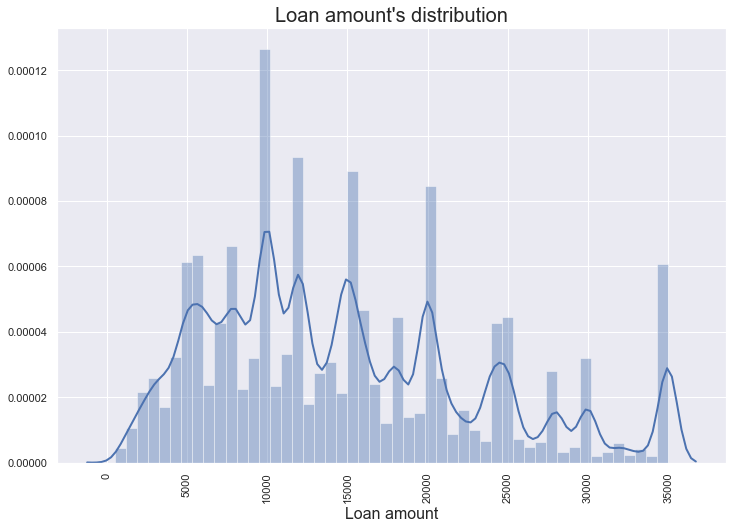

In [14]:
loan_amnt_distribution()

In [15]:
df_loan['loan_amnt'].max()

35000.0

Insights: Loans on lending club have highest loan amount of 35000 dollars. And loans with loan amount around 10000 dollars are most frequent on lending club platform.

## Data Visualization : Loan Purpose

In [16]:
def purpose_bar():
    plt.figure(figsize=(12, 8))
    sns.set()
    sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
    total = float(len(df_loan.index))
    ax = sns.countplot(x="purpose", data = df_loan, palette="Set2")
    ax.set(yscale = "log")
    plt.xticks(rotation=90)
    plt.title('Purpose', fontsize = 20)
    plt.show()

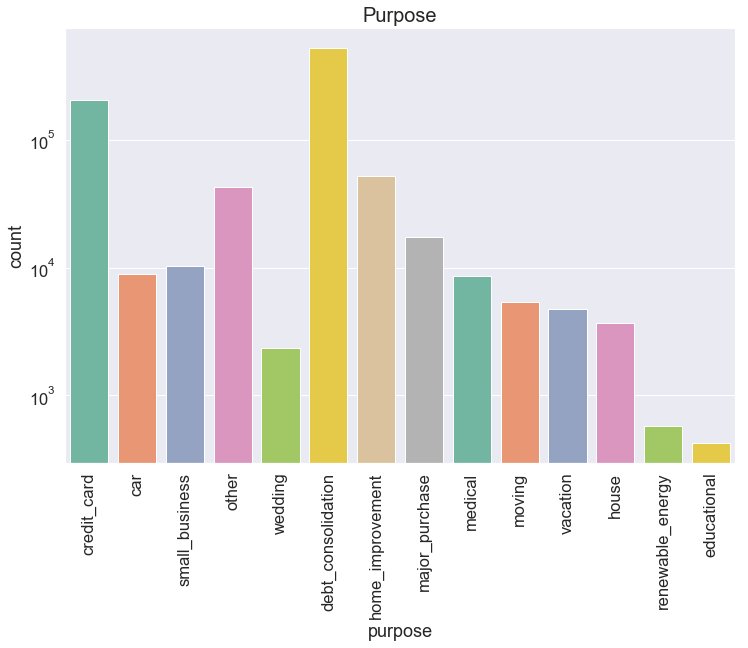

In [17]:
purpose_bar()

In [18]:
df_loan.groupby('purpose').count().apply(lambda g: g / g.sum())['id']

purpose
car                   0.009988
credit_card           0.232349
debt_consolidation    0.590745
educational           0.000477
home_improvement      0.058407
house                 0.004177
major_purchase        0.019470
medical               0.009624
moving                0.006101
other                 0.048338
renewable_energy      0.000648
small_business        0.011694
vacation              0.005337
wedding               0.002645
Name: id, dtype: float64

Insight: Most frequent loan purpose of loans from lending club platform is to pay other debts. Around 59% of loans are taken for debt consolication, and around 23% of loans are taken for credit card, hence, about 82% loans are for taken to resolve other debts.

## Summary Statistics and Data Visualization : Grade versus Likehood of Chargeoff

In [19]:
def crosstab(df,col):
    """
    df : Dataframe
    col: Column Name
    """
    crosstab = pd.crosstab(df[col], df['loan_status'],margins=True)
    crosstab['Likelihood_Charged Off'] = round((crosstab['Charged Off']/crosstab['All']),3)
    crosstab = crosstab[0:-1]
    return crosstab

In [20]:
def bivariate_prob(df,col,stacked= True):
    """
    df      : Dataframe
    col     : Column Name
    stacked : True(default) for Stacked Bar
    """
    
    plotCrosstab = crosstab(df,col)
    
    linePlot = plotCrosstab[['Likelihood_Charged Off']]      
    barPlot =  plotCrosstab.iloc[:,0:2]
    ax = linePlot.plot(figsize=(20,8), marker='o',color = 'b')
    ax2 = barPlot.plot(kind='bar',ax = ax,rot=1,secondary_y=True,stacked=stacked)
    ax.set_title(df[col].name.title()+' vs Likelihood Charge Off',fontsize=20,weight="bold")
    ax.set_xlabel(df[col].name.title(),fontsize=14)
    ax.set_ylabel('Likelihood of Charged off',color = 'b',fontsize=14)
    ax2.set_ylabel('Number of Applicants',color = 'g',fontsize=14)
    plt.show()

loan_status,Charged Off,Current,Default,Does not meet the credit policy. Status:Charged Off,Does not meet the credit policy. Status:Fully Paid,Fully Paid,In Grace Period,Issued,Late (16-30 days),Late (31-120 days),All,Likelihood_Charged Off
grade,,,,,,,,,,,,
A,2617,103322,47,8,90,39679,365,1448,134,492,148202,0.018
B,9519,171735,198,85,269,66546,1240,2529,410,2004,254535,0.037
C,12642,171175,360,148,481,52678,1887,2472,678,3339,245860,0.051
D,10486,91984,312,197,494,30020,1405,1185,569,2890,139542,0.075
E,6258,47061,201,158,378,12928,908,593,368,1852,70705,0.089
F,2934,13589,79,93,154,4726,354,194,155,768,23046,0.127
G,792,2913,22,72,122,1146,94,39,43,246,5489,0.144


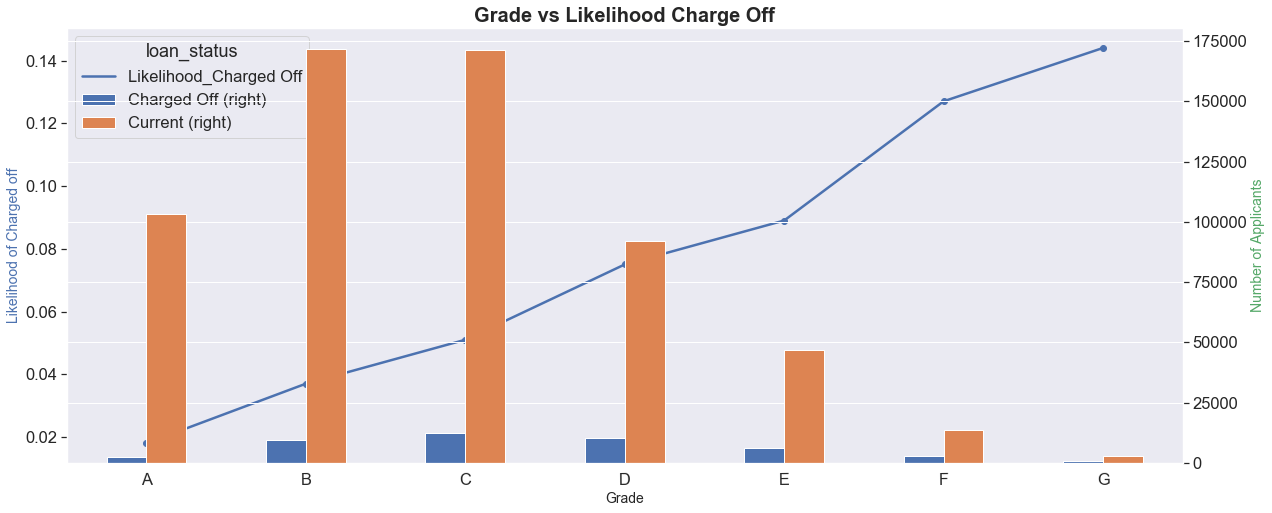

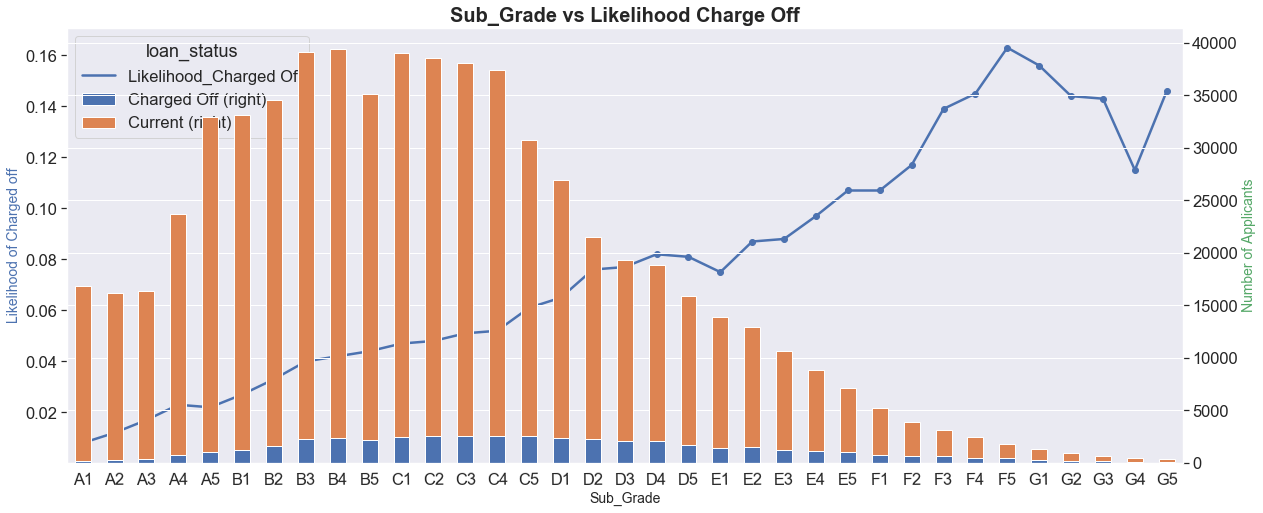

In [21]:
grade = crosstab(df_loan,'grade')
display(grade)
bivariate_prob(df =df_loan,col ='grade',stacked=False)
bivariate_prob(df =df_loan,col ='sub_grade')

insights: As grade of loan got worse from Grade A to G, likelihood that loan will charged off increses. This supports that loan grade provided by lending club as a whole is a good incidator of chargeoff likelihood.

## Summary Statistics: Average Interest rate grouped by term and loan grade

In [22]:
print("Average interest rate on the platform is %f"%(df_loan['int_rate'].mean()),"%")

Average interest rate on the platform is 13.246740 %


In [23]:
def group_term_grade(df_loan):
    data_group_by_grade_term = df_loan.groupby(['grade', 'term'])['int_rate'].mean()
    data_group_by_grade_term_df = pd.DataFrame(data_group_by_grade_term).reset_index()
    data_group_by_grade_term_pivot = data_group_by_grade_term_df.pivot(index='grade', 
                                                                       columns='term', values='int_rate')
    return data_group_by_grade_term_pivot

In [24]:
data_group_by_grade_term_pivot = group_term_grade(df_loan)
data_group_by_grade_term_pivot

term,36 months,60 months
grade,,
A,7.215919,7.998581
B,10.864500,10.655718
C,13.921937,14.093312
D,17.163474,17.190871
E,19.764985,19.956477
F,23.325132,23.644718
G,23.982595,25.861530


Insights: Compared with 36 months term loans, 60 months loans have higher interest rates. And with the grade of loan get worse, interest rate goes higher. 

## Summary Statistics: Group aggregation of annul income and of derogatory public records number

In [25]:
df_loan.groupby('loan_status')['annual_inc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,45248.0,65085.132717,56971.438026,4080.0,40000.00,56000.0,78000.0,8706582.0
Current,601779.0,76152.808252,66413.600912,0.0,46000.00,65000.0,90000.0,9500000.0
Default,1219.0,66754.126612,52738.783324,9300.0,40000.00,56000.0,80000.0,1300000.0
Does not meet the credit policy. Status:Charged Off,761.0,69525.915033,62127.473200,2000.0,36000.00,54000.0,78206.0,700000.0
Does not meet the credit policy. Status:Fully Paid,1984.0,72145.418271,71092.743751,1896.0,38283.75,57000.0,85000.0,1440000.0
Fully Paid,207723.0,74161.752983,59080.659729,3000.0,45000.00,64162.0,90000.0,7141778.0
In Grace Period,6253.0,76131.741458,125464.075295,7680.0,45000.00,64000.0,90000.0,8900060.0
Issued,8460.0,78318.142188,65936.561048,8200.0,47685.00,67000.0,95000.0,3964280.0
Late (16-30 days),2357.0,73279.117959,45624.096612,10000.0,45000.00,62000.0,90000.0,600000.0


In [26]:
df_loan.groupby('loan_status')['pub_rec'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,45248.0,0.145045,0.446958,0.0,0.0,0.0,0.0,12.0
Current,601779.0,0.215971,0.631610,0.0,0.0,0.0,0.0,86.0
Default,1219.0,0.217391,0.532515,0.0,0.0,0.0,0.0,5.0
Does not meet the credit policy. Status:Charged Off,758.0,0.124011,0.337727,0.0,0.0,0.0,0.0,2.0
Does not meet the credit policy. Status:Fully Paid,1962.0,0.093782,0.340039,0.0,0.0,0.0,0.0,5.0
Fully Paid,207723.0,0.143090,0.434046,0.0,0.0,0.0,0.0,15.0
In Grace Period,6253.0,0.215417,0.641001,0.0,0.0,0.0,0.0,20.0
Issued,8460.0,0.250709,0.650665,0.0,0.0,0.0,0.0,12.0
Late (16-30 days),2357.0,0.231650,0.611685,0.0,0.0,0.0,0.0,12.0


Insights: With borrowers' annual income increase, loans are less likely to charge off or go default. And when borrowers with more public derogatory records, loans are more likely to charge off or go default.